# Homework 6: 

**DUE:** 5pm EST, April 9, 2020



### **Conceptual:** Short answer questions. Be concise

---

I worked with Shirley, Doug, Brett, & Debbie on this homework

1. Let us consider the "curse of dimensionality" (i.e., when the ratio of predictor variables, p, to observations, n, is high) in the context of kNN. Answer the following:

<br>

(a) Suppose that we have a set of observations, each with measurements on p = 1 feature, X. We assume that X is uniformly (evenly) distributed between 0 and 1. Associated with each observation is a response value. Suppose that we wish to predict a test observation’s response using only observations that are within 10% of the range of X closest to that test observation. For instance, in order to predict the response for a test observation with X = 0.6, we will use observations in the range [0.55,0.65]. On average, what fraction of the available observations will we use to make the prediction?

**Answer:**

Given that X is uniformly distribuetd between 0 and 1, 10% of the range of the X value of the test observation will be 10% of the data. Thus we will use 10% of the data to when making a prediction about any new observation.

(b) Suppose that we have a set of observations, each with measurements on p = 2 features, X1 and X2. We assume that (X1,X2) are uniformly distributed between 0 and 1. We wish to predict a test observation’s response using only observations that are within 10% of the range of X1 and within 10% of the range of X2 closest to that test observation. For instance, in order to predict the response for a test observation with X1 = 0.6 and X2 = 0.35, we will use observations in the range [0.55, 0.65] for X1 and in the range [0.3, 0.4] for X2. On average, what fraction of the available observations will we use to make the prediction?

**Answer:**
As in question (a), any new observation will be compared against 10% of each X variable values, though now observations will only be compared against the overlap of that 10%, or 10%x10% = 1%. Thus we will use 1% of all available data when making a prediction about any new observation.


(c) Now suppose that we have a set of observations on p = 100 features. Again the observations are uniformly distributed on each feature, and again each feature ranges in value from 0 to 1. We wish to predict a test observation’s response using observations within the 10% of each feature’s range that is closest to that test observation. What fraction of the available observations will we use to make the prediction?

**Answer:**
As in question (b), any new observation will be compared with the overlaping space of 10% of the values of all 100 X variables, or 10%^100. 


(c)  Using your answers to parts (a)–(c), argue that a drawback of KNN when p is large is that there are very few training observations “near” any given test observation.

**Answer:**
When p is large, n must be significantly larger in order for enough observations to fall in the overlapping space of the predictor variables. When p is large, the number of neighbors, or observations with similar values of all Xs to compare it to, gets smaller. Put another way, the likelihood that any test observation will have similar values on a large range of predictor variables to numerous other observations in the original data gets smaller with every additional X variable.

---

2. Explain how k-fold cross-validation is implemented. What are the advantages and disadvantages of k-fold cross-validation relative to LOOCV?


**Answer:**
K-fold cross validation is implemented by determining a value of k folds, or subsets of the data, and running the statistical model k times with each K-fold acting as the hold-out test set once in one iteration of the model. The test error is averaged across the K-folds.

K-fold cross validation is computationally more efficient than LOOCV, but also balances the bias-variance tradeoff. Whereas LOOCV has high variance (is affected by high leverage points and tends to underestimate test error due to its flexibility and single held-out observation), K-fold CV is slightly more biased but less flexible than LOOCV. LOOCV, however, is more stable across iterations because only one observation is held out.

---

3. Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

**Answer:**
Permutation test offer a way of generating a null hypothesis distribution for any statistical test given the data available, whereas bootstrapping allows us to quantify the certainty of a given estimate (e.g., a regression coefficient). Both tools are non-parametric, meaning that they do not assume the underlying distribution from which the data were drawn.

Permutation tests essentially scramble values within the dataset to create a chance set. For example, if comparing the means of two groups, the permutation test would scramble group assignment to create a dataset where group ID and the value of some continuous Y variable are randomly generated. The data is scrambled a set number of times and the test statistic calculated for each random generation of data, creating a distribution of test values given no meaningful association between the grouping variable and the Y variable. Then, the test statistic from the original data is generated and compared against the chance distribution, much like a traditional NHST.

Bootstrapping uses the law of large numbers to re-sample from the dataset in order to simulate multiple experiments and generate the distribution of any statistical parameter. By resampling the data with repalcement, any observation can be randomly selected (more than once) to be part of a new bootstrapped sample with which the statistical parameter is estimated. These estimated parameters create the sampling distribution that approximates the distribution of the parameter in the population. The parameter from the original data can be compared to the computed confidence interval of the parameter from the bootstrapped samples.


---

### **Applied:** Show your code & plots

We will use both datasets from the HCP dataset for these problems. Include conceptual answers to questions as comments in code cells. You should use the tidyverse and class libraries for this assignment, as well as the data table for the HCP data set.

4. Use kNN to build a classifier that for predicting Gender using the unadjusted Flanker task performance (Flanker_unadj). 

(a) Split the data set up into 1006 training observations and 200 test observations. Clasffiy using kNN with k = 5. Show your classification accuracy as a predicted vs. observed table, and report the mean classification accuracy.

In [2]:
# -------------------------------
# Question 4
# -------------------------------


# (a)
install.packages("class")
library(class)
library(tidyverse)
unrestricted_trimmed_1_7_2020_10_50_44 <- read.csv("~/Github_Repo/DataScience2020/Maheux_DSPN_S20/Data/unrestricted_trimmed_1_7_2020_10_50_44.csv")
data <- unrestricted_trimmed_1_7_2020_10_50_44


data %>% select(Subject,Gender,Flanker_Unadj) -> data
data$Gender <- as.numeric(data$Gender)
train=sample(nrow(data), 1006)
train_d<-data[train,]
test_d<-data[-train,]

predicted<-knn(train_d, test_d, train_d$Gender, k=5,l=0,prob=F,use.all=T) 
accuracy_table = data.frame(predicted, test_d$Gender) 
colnames(accuracy_table) = c('predicted', 'actual')
table(accuracy_table)
mean(accuracy_table$predicted == accuracy_table$actual)


#The classification accuracy is 43%



The downloaded binary packages are in
	/var/folders/s4/4g5lpcm12wb_tq2cjnz4gh240000gn/T//RtmpRvUSK0/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



         actual
predicted  1  2
        1 54 66
        2 48 32

[1] 0.43

(b) Now repeat your analysis using a range of k's, from 1-100. Plot the performance of the classifier (i.e., accuracy) for each value of k. Which value gives you the highest accuracy and what is the accuracy for that best k?


The downloaded binary packages are in
	/var/folders/s4/4g5lpcm12wb_tq2cjnz4gh240000gn/T//RtmpRvUSK0/downloaded_packages


[1] 0.54

[1] 2

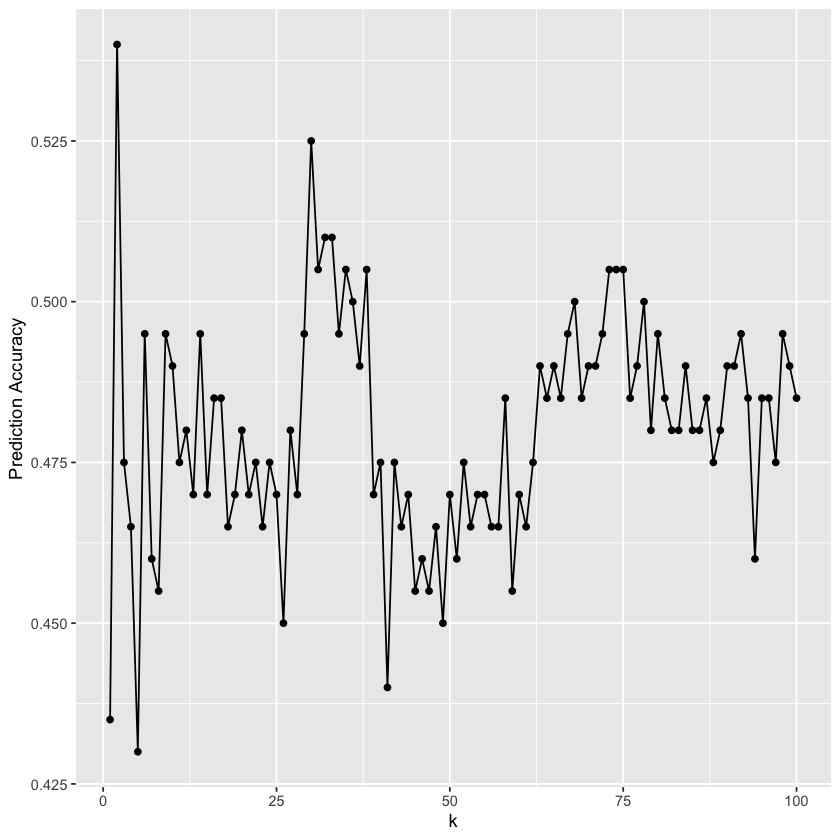

In [12]:
# (b)

install.packages("class")
library(class)

set.seed(1)
k_num = 1:100
acc_k = rep(x = 0, times = length(k_num))

for (i in seq_along(k_num)) {
  pred_val = knn(train_d, 
                 test_d, 
                 train_d$Gender, 
                 k_num[i])
  acc_k[i] <- mean(pred_val==test_d$Gender)
}

acc_data <- data.frame(k_num,acc_k)

library(ggplot2)
ggplot(acc_data,aes(k_num,acc_k))+geom_point()+geom_line()+xlab("k")+ylab("Prediction Accuracy")
max(acc_data$acc_k)

acc_data$k_num[acc_data$acc_k==max(acc_k)]

#the best value of K is 2
#The classification accuracy with K=2 is 54%


5. Use bootstrapping to estimate the confidence on the regression coefficients for a logistic regression model using Flanker_unadj scores to predict Gender. Use 5000 iterations off the bootstrap. Report whether any of the coefficients are statistically significant using the standard error estimates off of the bootstrap.

In [13]:
# -------------------------------
# Question 5
# -------------------------------
data$Gender <- as.factor(data$Gender)

model <- glm(Gender~Flanker_Unadj, data=data, family="binomial")
coef_table <- data.frame(model$coefficients)

library(boot)
boot.fn <- function(data, index){  
  return(coef(glm(Gender~Flanker_Unadj, data=data, family="binomial", subset=index)))
  }

bootstrapped = boot(data ,boot.fn ,R=5000)
print(bootstrapped) #t1=intercept, t2=flanker coefficient

#95% CI = Coefficient +/- 2*SE
coef_table[2,] +2*0.006005613
coef_table[2,] -2*0.006005613
#the bootstrapped 95% CI is [.02, .04]
coef_table[1,] +2*0.673882997
coef_table[1,] -2*0.673882997
#the bootstrapped 95% CI for the intercept is [-4.79, -2.09]

#both the coefficient for Flanker scores and the intercept are statisticaly significant
#at the .05 level because the 95% CIs do not contain 0


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = boot.fn, R = 5000)


Bootstrap Statistics :
       original        bias    std. error
t1* -3.44174036 -0.0173724012 0.682172954
t2*  0.02931477  0.0001429323 0.006086009


[1] 0.04132599

[1] 0.01730354

[1] -2.093974

[1] -4.789506